# 13wk-56: 타이타닉 / 자료분석(Autogluon)

최규빈  
2023-12-01

# 1. 강의영상

[????](????)

# 2. Imports

In [1]:
#!pip install autogluon.eda

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#---#
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [9]:
!kaggle competitions download -c titanic

100%|███████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 326kB/s]
100%|███████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 325kB/s]

In [10]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               

In [11]:
df_train = pd.read_csv('train.csv')

In [12]:
!rm gender_submission.csv
!rm test.csv
!rm train.csv
!rm titanic.zip

# 4. 적합

In [14]:
df_train.head()

In [15]:
# step1 -- pass
# step2 
predictr = TabularPredictor(label = 'Survived')
# step3 
predictr.fit(df_train,num_gpus=1)
# step4 
yhat = predictr.predict(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231130_200317/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231130_200317/"
AutoGluon Version:  0.8.1
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #140-Ubuntu SMP Thu Aug 4 02:23:37 UTC 2022
Disk Space Avail:   1585.54 GB / 1887.51 GB (84.0%)
Train Data Rows:    891
Train Data Columns: 11
Label Column: Survived
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
    2 unique label values:  [0, 1]
    If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
    A

# 5. 해석 및 시각화

## A. y의 분포, (X,y)의 관계 시각화

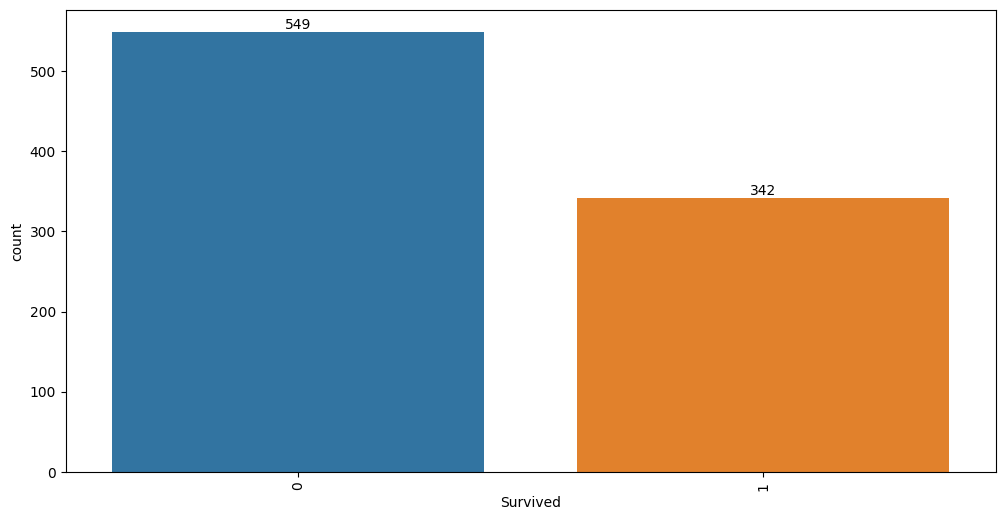

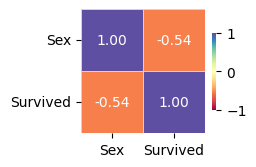

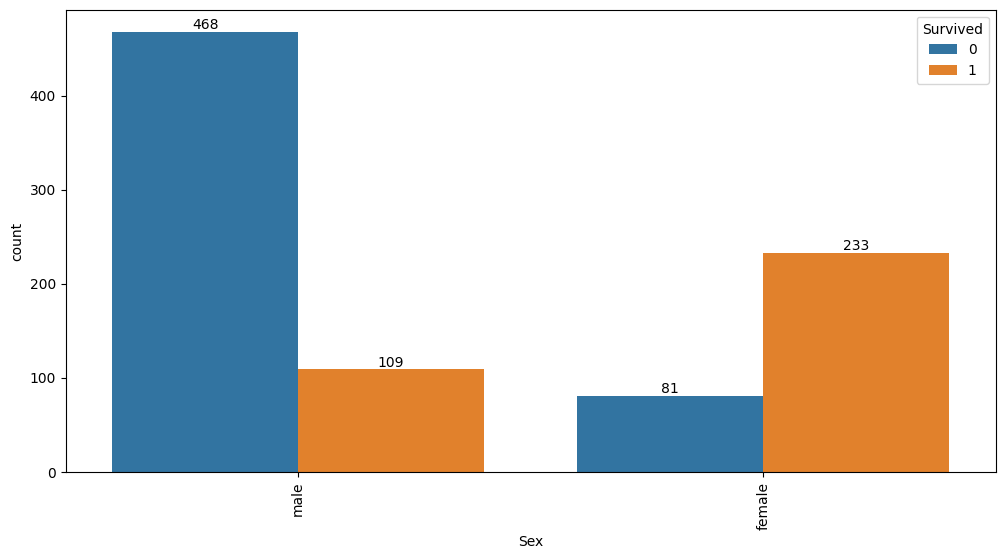

In [16]:
auto.target_analysis(
    train_data=df_train, 
    label='Survived',
    fit_distributions=False
)

## B. 중요한 설명변수

No path specified. Models will be saved in: "AutogluonModels/ag-20231130_200338/"

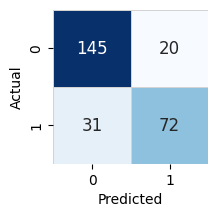

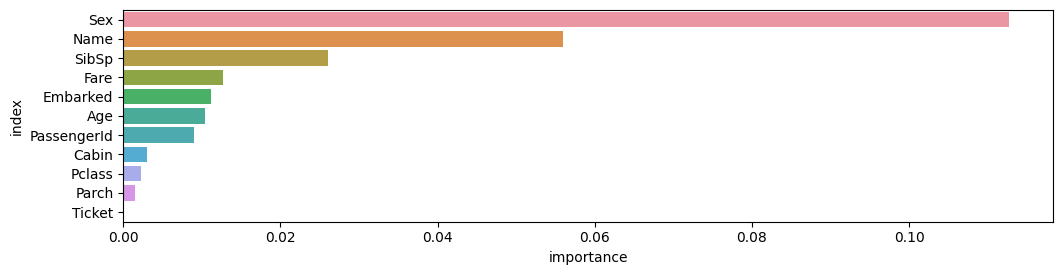

In [17]:
auto.quick_fit(
    train_data = df_train, 
    label='Survived',
    show_feature_importance_barplots=True
)

## C. 관측치별 해석

`-` 1번관측치

In [18]:
predictr.predict(df_train.iloc[[1]])

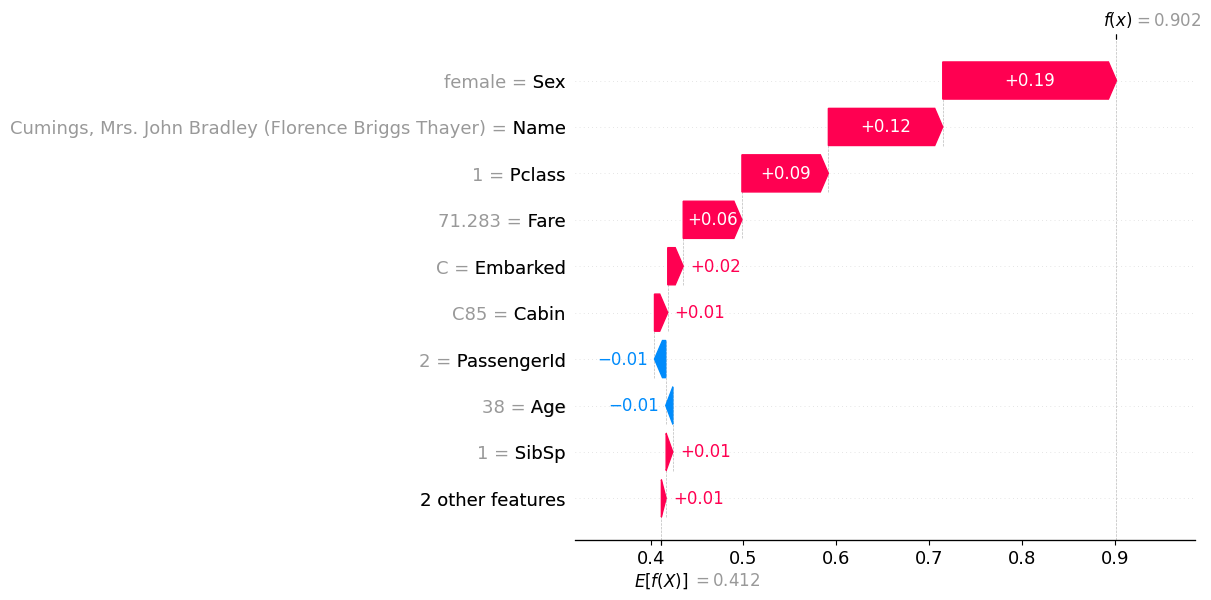

In [19]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    display_rows=True,
    plot='waterfall',
    rows=df_train.iloc[[1]]
)

-   이름이 중요하다?

`-` 이름을 바꿔보자..

In [20]:
onerow = df_train.iloc[[1]].copy()

In [22]:
onerow['Name']

In [23]:
onerow['Name'] = 'Cumings, Mr. John Bradley'

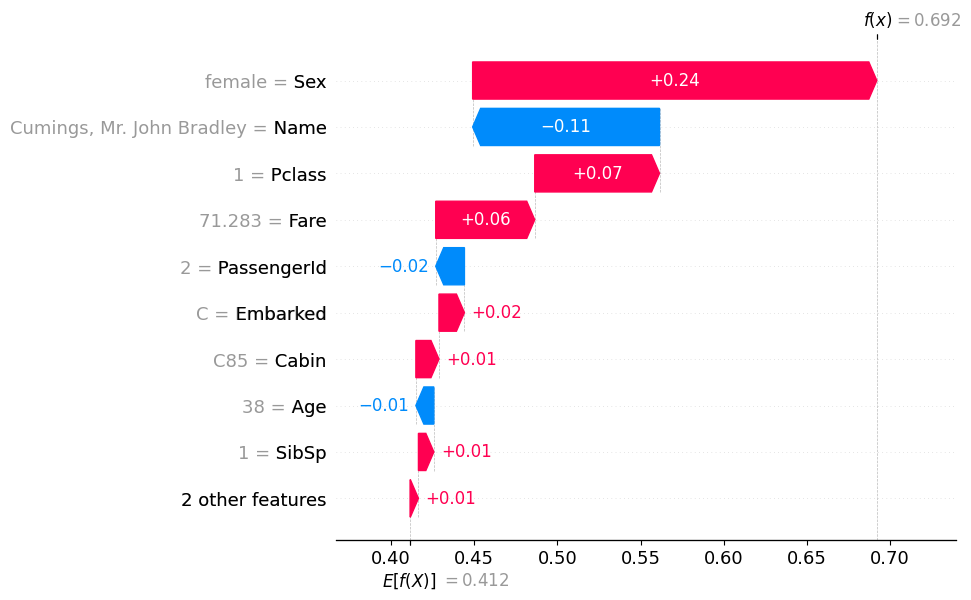

In [24]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    display_rows=True,
    plot='waterfall',
    rows=onerow
)

-   남자라는거징..